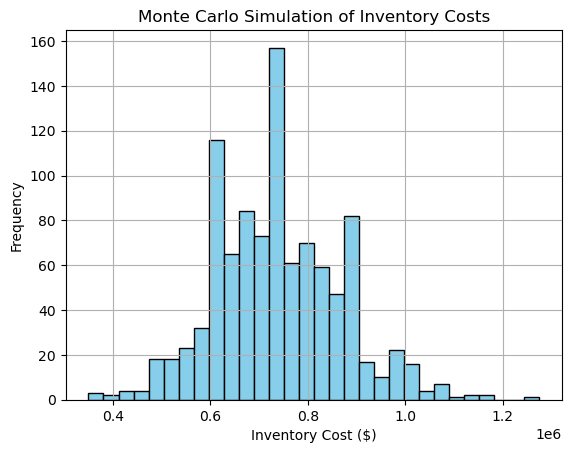

Average inventory cost from simulations: $737650.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Monte Carlo simulation
lead_time = 4  # in weeks
cost_per_order = 25000  # Cost per order in $
num_simulations = 1000  # Number of simulations
max_shelf_time = 1.5  # Maximum shelf time for inventory in weeks
max_customer_wait_time = 21  # Maximum time customers are willing to wait (in days)

# Simulate inventory for 365 days (1 year)
days = 365
inventory_simulation = []

for _ in range(num_simulations):
    customer_wait_times = np.random.normal(loc=14, scale=5, size=days)  # Customers expect a 2-week wait time
    shelf_times = np.random.uniform(0, max_shelf_time, days)  # Random shelf time for stock
    
    # Calculate the number of days inventory sat on the shelf and customer wait times
    inventory_cost = (np.sum(customer_wait_times > max_customer_wait_time) * cost_per_order) + (np.sum(shelf_times > max_shelf_time) * cost_per_order)
    
    inventory_simulation.append(inventory_cost)

# Plot the simulation results
plt.hist(inventory_simulation, bins=30, color='skyblue', edgecolor='black')
plt.title('Monte Carlo Simulation of Inventory Costs')
plt.xlabel('Inventory Cost ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Results
mean_inventory_cost = np.mean(inventory_simulation)
print(f"Average inventory cost from simulations: ${mean_inventory_cost:.2f}")